<a href="https://colab.research.google.com/github/bearnon/ai_hw4_cnn/blob/main/0816102_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: CNN

## Description

Implement a Convolutional Neural Network (CNN) classifier to predict whether a given icon image is the real / fake. Where the fake images were generated by TAs with a neural network.

- You are not required to use Colab in this assignment, but you have to **submit your source code**.

## Dataset

- https://lab.djosix.com/icons.zip
- 64x64 RGB jpg images


```
real/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
fake/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
unknown/        (5350 images, testing set)
    0000.jpg
    0001.jpg
    ...
    5349.jpg
```

- Training set
  - 20000 icons in `real/` and `fake/`
  - You should predict 1 for icons in `real/` and 0 for icons in `fake/`
- Testing set:
  - 5350 icons in `unknown/`
  - Your score depends on the **accuracy** on this testing set,  
    so the prediction of each icon in `unknown/` should be submitted (totally 5350 predictions, see below).


## Submission

Please upload **2 files** to E3. (`XXXXXXX` is your student ID)

1. **`XXXXXXX_4_result.json`**  
  This file contains your model prediction for the testing set.  
  You must generate this file with the function called `save_predictions()`.
2. **`XXXXXXX_4_source.zip`**  
  Zip your source code into this archive.


## Hints

- **Deep Learning Libraries**: You can use any deep learning frameworks (PyTorch, TensorFlow, ...).
- **How to implement**: There are many CNN examples for beginners on the internet, e.g. official websites of the above libraries, play with them and their model architectures to abtain high accuracy on testing set.
- **GPU/TPU**: Colab provides free TPU/GPU for training speedup, please refer to [this page in `pytut.pdf` on E3](https://i.imgur.com/VsrUh7I.png).


### Include this in your code to generate result file

In [ ]:
import json

def save_predictions(student_id, predictions):
  # Please use this function to generate 'XXXXXXX_4_result.json'
  # `predictions` is a list of int (0 or 1; fake=0 and real=1)
  # For example, `predictions[0]` is the prediction given "unknown/0000.jpg".
  # it will be 1 if your model think it is real, else 0 (fake).

  assert isinstance(student_id, str)
  assert isinstance(predictions, list)
  assert len(predictions) == 5350

  for y in predictions:
    assert y in (0, 1)

  with open('{}_4_result.json'.format(student_id), 'w') as f:
    json.dump(predictions, f)


###My Code:

####initial:

In [1]:
import os, pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms

!pip install split-folders
import splitfolders

# def load_data():
if not os.path.exists('data'):
  # !mkdir image
  os.mkdir("data")
  url = 'https://lab.djosix.com/icons.zip'
  assert os.system(f'wget -O icons.zip {url}') == 0
  assert os.system('unzip icons.zip -d ./data') == 0
  os.system("cp -R data/unknown test/")
  !rm -r data/unknown
  # os.rmdir("data/unknown")
  # !rm icons.zip
# return fake, real, unknown

# print(img_data)

In [ ]:
splitfolders.ratio('data','datatv',2141,(0.5,0.5))

####model:

In [37]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Sequential(
      nn.Conv2d(3,64,3,1), #convolution
      nn.BatchNorm2d(64),
      nn.ReLU(True)
    )
    self.conv2 = nn.Sequential(
      nn.Conv2d(64,256,5,2),
      nn.BatchNorm2d(256),
      nn.ReLU(True)
    )
    self.conv3 = nn.Sequential(
      nn.Conv2d(256,256,3,1),
      nn.BatchNorm2d(256),
      nn.ReLU(True)
    )
    self.conv4 = nn.Sequential(
      nn.Conv2d(128,64,5,1),
      nn.BatchNorm2d(64),
      nn.ReLU(True)
    )
    self.conv5 = nn.Sequential(
      nn.Conv2d(64,64,3,1),
      nn.BatchNorm2d(64),
      nn.ReLU(True)
    )
    self.conv6 = nn.Sequential(
      nn.Conv2d(64,64,3,1),
      nn.BatchNorm2d(64),
      nn.ReLU(True)
    )
    # self.conv2 = nn.Conv2d(64,128,5,2)
    # self.conv3 = nn.Conv2d(128,128,3,1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(1024,64)
    self.fc2 = nn.Linear(64,32)
    self.fc3 = nn.Linear(32,32)
    self.fc4 = nn.Linear(32,2)

  def forward(self,x):
    x = self.conv1(x)
    x = F.max_pool2d(x,2)
    x = self.conv2(x)
    x = F.max_pool2d(x,2)
    x = self.conv3(x)
    # x = self.conv4(x)
    # x = self.conv5(x)
    # x = self.conv6(x)
    x = F.max_pool2d(x,2)
    x = self.dropout1(x)
    x = torch.flatten(x,1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    output = F.log_softmax(x,dim=1)
    return output


In [40]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(3,64,7,2,padding=3),
        nn.BatchNorm2d(64),
        nn.ReLU(True)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(64,64,3,1,padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(True),
        nn.Conv2d(64,64,3,1,padding=1),
        nn.BatchNorm2d(64)
    )
    self.conv3a = nn.Sequential(
        nn.Conv2d(64,128,3,2,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.Conv2d(128,128,3,1,padding=1),
        nn.BatchNorm2d(128)
    )
    self.ds3 = nn.Sequential(
        nn.Conv2d(64,128,1,2),
        nn.BatchNorm2d(128)
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(128,128,3,1,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        nn.Conv2d(128,128,3,1,padding=1),
        nn.BatchNorm2d(128)
    )
    self.conv4a = nn.Sequential(
        nn.Conv2d(128,256,3,2,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.Conv2d(256,256,3,1,padding=1),
        nn.BatchNorm2d(256)
    )
    self.ds4 = nn.Sequential(
        nn.Conv2d(128,256,1,2),
        nn.BatchNorm2d(256)
    )
    self.conv4 = nn.Sequential(
        nn.Conv2d(256,256,3,1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        nn.Conv2d(256,256,3,1,padding=1),
        nn.BatchNorm2d(256)
    )
    self.conv5a = nn.Sequential(
        nn.Conv2d(256,512,3,2,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(512,512,3,1,padding=1),
        nn.BatchNorm2d(512)
    )
    self.ds5 = nn.Sequential(
        nn.Conv2d(256,512,1,2),
        nn.BatchNorm2d(512)
    )
    self.conv5 = nn.Sequential(
        nn.Conv2d(512,512,3,1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        nn.Conv2d(512,512,3,1,padding=1),
        nn.BatchNorm2d(512)
    )
    self.avgpool = nn.AdaptiveAvgPool2d((1,1))
    self.fc = nn.Linear(512,2)

  def forward(self,x):
    x = self.conv1(x)
    x = F.max_pool2d(x,3,stride=2,padding=1)

    x = self.conv2(x)
    x = self.conv2(x)
    x = self.conv2(x)
    
    d1 = self.ds3(x)
    x = self.conv3a(x)
    # print(d1.shape)
    # print(x.shape)
    x += d1
    x = F.relu(x)
    x = self.conv3(x)
    x = self.conv3(x)
    x = self.conv3(x)

    d2 = self.ds4(x)
    x = self.conv4a(x)
    x += d2
    x = F.relu(x)
    x = self.conv4(x)
    x = self.conv4(x)
    x = self.conv4(x)
    x = self.conv4(x)
    x = self.conv4(x)

    d3 = self.ds5(x)
    x = self.conv5a(x)
    x += d3
    x = F.relu(x)
    x = self.conv5(x)
    x = self.conv5(x)
    # print(x.shape)
    
    x = self.avgpool(x)
    x = torch.flatten(x,1)
    x = self.fc(x)
    return x
    



In [43]:
class BasicBlock(nn.Module):
  expansion = 1

  def __init__(self, inplanes, planes, stride=1, downsample=None):
    super().__init__()
    self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                  padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(planes)
    self.relu = nn.ReLU(inplace=True)
    self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1,
                  padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(planes)
    self.downsample = downsample
    self.stride = stride

  def forward(self, x):
    identity = x

    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    out = self.conv2(out)
    out = self.bn2(out)

    if self.downsample is not None:
        identity = self.downsample(x)

    out += identity
    out = self.relu(out)

    return out
  def _make_layer(block, inplanes,planes, blocks, stride=1):
    downsample = None  
    if stride != 1 or inplanes != planes:
        downsample = nn.Sequential(            
            nn.Conv2d(inplanes, planes, 1, stride, bias=False),
            nn.BatchNorm2d(planes),
        )
    layers = []
    layers.append(block(inplanes, planes, stride, downsample))
    inplanes = planes
    for _ in range(1, blocks):
        layers.append(block(inplanes, planes))
    return nn.Sequential(*layers)


# class ResNet(nn.Module):
class CNN(nn.Module):
  def __init__(self, block, layers, num_classes=1000):
    super().__init__()
    
    self.inplanes = 64

    self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                            bias=False)
    self.bn1 = nn.BatchNorm2d(self.inplanes)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    
    self.layer1 = self._make_layer(block, 64, layers[0])
    self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
    self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
    self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
    
    self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.fc = nn.Linear(512 , num_classes)


  def _make_layer(self, block, planes, blocks, stride=1):
    downsample = None  

    if stride != 1 or self.inplanes != planes:
        downsample = nn.Sequential(
            nn.Conv2d(self.inplanes, planes, 1, stride, bias=False),
            nn.BatchNorm2d(planes),
        )

    layers = []
    layers.append(block(self.inplanes, planes, stride, downsample))
    
    self.inplanes = planes
    
    for _ in range(1, blocks):
        layers.append(block(self.inplanes, planes))

    return nn.Sequential(*layers)

  
  def forward(self, x):
    x = self.conv1(x)           # 224x224
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)         # 112x112

    x = self.layer1(x)          # 56x56
    x = self.layer2(x)          # 28x28
    x = self.layer3(x)          # 14x14
    x = self.layer4(x)          # 7x7

    x = self.avgpool(x)         # 1x1
    x = torch.flatten(x, 1)     # remove 1 X 1 grid and make vector of tensor shape 
    x = self.fc(x)

    return x

# def resnet34():
# def CNN():
#   layers=[3, 4, 6, 3]
#   model = ResNet(BasicBlock, layers)
#   return model

####train & val:

In [41]:
def train(model,device,loader,optimizer,epoch):
  model.train()
  tloss = 0
  tcorrect = 0
  for idx,(input,target) in enumerate(loader):
    input,target = input.to(device),target.to(device)
    optimizer.zero_grad()
    output = model(input)
    # print(len(loader))
    # print(output,target)
    # tloss += F.nll_loss(output,target,reduction='sum').item()
    tloss += F.cross_entropy(output,target,reduction='sum').item()
    pred = output.argmax(dim=1,keepdim=True)
    tcorrect += pred.eq(target.view_as(pred)).sum().item()
    # loss = F.nll_loss(output,target)
    loss = F.cross_entropy(output,target)
    loss.backward()
    optimizer.step()
    if idx%1000 == 0:
    # if idx<100:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format( epoch, idx * len(input), len(loader.dataset), 100. * idx / len(loader), loss.item()))
  tloss /= len(loader.dataset)
  print('Train: Average loss: {:.4f}, Accuracy: {}/{} ({:.4f})'.format(tloss,tcorrect,len(loader.dataset),tcorrect/len(loader.dataset)))
  
  
def val(model,device,loader):
  model.eval()
  vloss = 0
  vcorrect = 0
  with torch.no_grad():
    for input,target in loader:
      input,target = input.to(device),target.to(device)
      output = model(input)
      # vloss += F.nll_loss(output,target,reduction='sum').item()
      vloss += F.cross_entropy(output,target,reduction='sum').item()
      pred = output.argmax(dim=1,keepdim=True)
      # print(target)
      # print(pred)
      # print(tgvasp)
      # print(pred.eq(target.view_as(pred)).sum().item())
      vcorrect += pred.eq(target.view_as(pred)).sum().item()
      # correct += temp
  vloss /= len(loader.dataset)
  print('\nVal set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( vloss, vcorrect, len(loader.dataset), 100. * vcorrect / len(loader.dataset)))

    ### if
    
    # print('Train Epoch: ',epoch)

In [44]:
# tran = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])
# tv_dataset = {x: datasets.ImageFolder(os.path.join('datatv',x),tran) for x in ['train','val']}
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
tv_dataset = {x: datasets.ImageFolder(os.path.join('datatv',x),transforms.ToTensor()) for x in ['train','val']}

batchSize = 100
for ep in range(5):
  tvdataloader = {x: torch.utils.data.DataLoader(tv_dataset[x],batch_size=batchSize,shuffle=True,num_workers=2) for x in ['train','val']}
  datasize = {x: len(tv_dataset[x]) for x in ['train','val']}
  
  # model = CNN().to(device)
  model = CNN(BasicBlock,[3,4,6,3]).to(device)
  optimizer = optim.Adam(model.parameters(),lr=0.0002)
  
  for epoch in range(100):
    trainmodel = train(model,device,tvdataloader['train'],optimizer,epoch)
    valmodel = val(model,device,tvdataloader['val'])
  

cuda:0
Train Epoch: 1 [0/16000 (0%)]	Loss: 6.919256
Train Epoch: 1 [1000/16000 (6%)]	Loss: 1.545968
Train Epoch: 1 [2000/16000 (12%)]	Loss: 0.634542
Train Epoch: 1 [3000/16000 (19%)]	Loss: 0.829269
Train Epoch: 1 [4000/16000 (25%)]	Loss: 0.804374
Train Epoch: 1 [5000/16000 (31%)]	Loss: 0.856872
Train Epoch: 1 [6000/16000 (38%)]	Loss: 0.644196
Train Epoch: 1 [7000/16000 (44%)]	Loss: 0.639166
Train Epoch: 1 [8000/16000 (50%)]	Loss: 0.492655
Train Epoch: 1 [9000/16000 (56%)]	Loss: 1.030082
Train Epoch: 1 [10000/16000 (62%)]	Loss: 0.755635
Train Epoch: 1 [11000/16000 (69%)]	Loss: 0.697282
Train Epoch: 1 [12000/16000 (75%)]	Loss: 0.641386
Train Epoch: 1 [13000/16000 (81%)]	Loss: 0.784478
Train Epoch: 1 [14000/16000 (88%)]	Loss: 0.683270
Train Epoch: 1 [15000/16000 (94%)]	Loss: 0.664279
Train: Average loss: 0.7239, Accuracy: 7962/16000 (0.4976)

Val set: Average loss: 1.1306, Accuracy: 2000/4000 (50%)

Train Epoch: 2 [0/16000 (0%)]	Loss: 0.575998
Train Epoch: 2 [1000/16000 (6%)]	Loss: 0.6461

KeyboardInterrupt: ignored

In [46]:

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Sequential(
      nn.Conv2d(3,64,3,1,padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(True)
    )
    self.conv2 = nn.Sequential(
      nn.BatchNorm2d(64),
      nn.ReLU(True),
      nn.Conv2d(64,64,3,1,padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(True),
      nn.Conv2d(64,64,3,1,padding=1)
      nn.BatchNorm2d(64),
      nn.ReLU(True),
    )
    self.sq1 = nn.Sequential(
      nn.AvgPool2d(2)
      nn.Conv2d(64,4,1,1)
      nn.ReLU(True),
      nn.Conv2d(4,64,1,1)
      nn.Sigmoid()
    )

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = F.avg_pool2d(x,2)
    w1 = self.sq1(x)
    x = 
    return output

SyntaxError: ignored

In [46]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(3,64,3,1,padding=1)
    self.conv64 = nn.Sequential(
        nn.Conv2d(64,64,3,1,padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(True)
    )
    self.conv128s = nn.Sequential(
        nn.Conv2d(64,128,3,1,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(True)
    )
    self.conv128 = nn.Sequential(
        nn.Conv2d(128,128,3,1,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(True)
    )
    self.conv256s = nn.Sequential(
        nn.Conv2d(128,256,3,1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(True)
    )
    self.conv256 = nn.Sequential(
        nn.Conv2d(256,256,3,1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(True)
    )
    self.conv512s = nn.Sequential(
        nn.Conv2d(256,512,3,1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(True)
    )
    self.conv512 = nn.Sequential(
        nn.Conv2d(512,512,3,1,padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(True)
    )
    self.fc = nn.Sequential(
        nn.Linear(25088,4096),
        nn.ReLU(True),
        nn.Dropout(0.25),
        nn.Linear(4096,4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        # print('ddkwljef'),
        nn.Linear(4096,1000),
        nn.Linear(1000,2)
    )

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv64(x)
    x = self.conv64(x)
    x = F.max_pool2d(x,2,stride=2)
    x = self.conv128s(x)
    x = self.conv128(x)
    x = F.max_pool2d(x,2,stride=2)
    x = self.conv256s(x)
    x = self.conv256(x)
    x = self.conv256(x)
    x = self.conv256(x)
    x = F.max_pool2d(x,2,stride=2)
    x = self.conv512s(x)
    x = self.conv512(x)
    x = self.conv512(x)
    x = self.conv512(x)
    x = F.max_pool2d(x,2,stride=2)
    x = self.conv512(x)
    x = self.conv512(x)
    x = self.conv512(x)
    x = self.conv512(x)
    x = F.max_pool2d(x,2,stride=2)
    x = torch.flatten(x,1)
    x = self.fc(x)
    output = F.log_softmax(x,dim=1)
    return output

In [ ]:
fake = np.ndarray((10000,64,64,3),dtype=int)
real = np.ndarray((10000,64,64,3),dtype=int)
unknown = np.ndarray((5350,64,64,3),dtype=int)
for i in range(10000):
  fake[i] = cv2.imread('./fake/' + '%04d'%i + '.jpg')
for i in range(10000):
  real[i] = cv2.imread('./real/' + '%04d'%i + '.jpg')
for i in range(5350):
  unknown[i] = cv2.imread('./unknown/' + '%04d'%i + '.jpg')
plt.imshow(real[50])
plt.show()

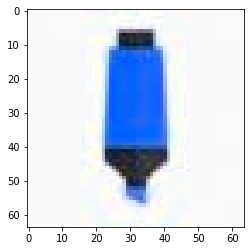

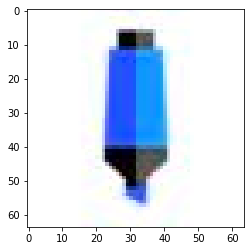

In [ ]:
n = 4421
plt.imshow(fake[n])
plt.show()
plt.imshow(real[n])
plt.show()